In [2]:
import tensorflow as tf


In [8]:
d=tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [95]:
(x_train, y_train), (x_test, y_test) = data = d2 = \
    tf.keras.datasets.boston_housing.load_data( test_split=0.2)
d2[0][0].shape, d2[0][1].shape,d2[1][0].shape,d2[1][1].shape,

((404, 13), (404,), (102, 13), (102,))

In [19]:
for i in d:
 for j in i:
    print (j.shape)
'''
Shape: 
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)

 training: 60K 28x28 images, 60K labels
 testing: 10K 28x28 images, 10K labels
'''
d[0][1][:20]

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [26]:
help(tf.keras.layers.Convolution2D)
help(tf.keras.layers.Dense)
help(tf.random.normal)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor of shape `(1, 1, d1)`
 |  (ther

In [60]:
inputs = tf.keras.Input(shape=(1,2,3))
layer1 = tf.keras.layers.Dense( 16, activation='relu')
layer1.trainable=False
help(layer1.get_weights)

Help on method get_weights in module tensorflow.python.keras.engine.base_layer:

get_weights() method of tensorflow.python.keras.layers.core.Dense instance
    Returns the current weights of the layer.
    
    The weights of a layer represent the state of the layer. This function
    returns both trainable and non-trainable weight values associated with this
    layer as a list of Numpy arrays, which can in turn be used to load state
    into similarly parameterized layers.
    
    For example, a Dense layer returns a list of two values-- per-output
    weights and the bias value. These can be used to set the weights of another
    Dense layer:
    
    >>> a = tf.keras.layers.Dense(1,
    ...   kernel_initializer=tf.constant_initializer(1.))
    >>> a_out = a(tf.convert_to_tensor([[1., 2., 3.]]))
    >>> a.get_weights()
    [array([[1.],
           [1.],
           [1.]], dtype=float32), array([0.], dtype=float32)]
    >>> b = tf.keras.layers.Dense(1,
    ...   kernel_initializer=tf

In [79]:
inputs = tf.keras.Input(shape=(3,), batch_size=8)
layer1 = tf.keras.layers.Dense( 32, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(2, activation='tanh')(layer1)
sanity_model = tf.keras.Model(inputs, outputs)
sanity_model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(8, 3)]                  0         
_________________________________________________________________
dense_30 (Dense)             (8, 32)                   128       
_________________________________________________________________
dense_31 (Dense)             (8, 2)                    66        
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________


In [106]:
inputs = tf.keras.Input(shape=(13,))
layer1a = tf.keras.layers.Dense( 32, activation='relu')(inputs)
layer1b = tf.keras.layers.Dense( 32, activation='relu')
layer1c = layer1b(inputs)
layer1b.trainable=False
layer1 = tf.keras.layers.Concatenate()([layer1a,layer1c])
outputs = tf.keras.layers.Dense(1, activation='tanh')(layer1)
concat_model = tf.keras.Model(inputs, outputs)
concat_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 13)]         0                                            
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 32)           448         input_21[0][0]                   
__________________________________________________________________________________________________
dense_36 (Dense)                (None, 32)           448         input_21[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 64)           0           dense_35[0][0]                   
                                                                 dense_36[0][0]            

In [112]:
loss_fn = tf.keras.losses.MeanSquaredError()
model.compile(optimizer='adam',
        loss=loss_fn,
        metrics=['accuracy'])


In [167]:
 tf. convert_to_tensor(y_test)
history=model.fit(x_train, y_train, epochs=5)
help(history)


Epoch 1/5


InvalidArgumentError:  Incompatible shapes: [8,2] vs. [32,2]
	 [[node gradient_tape/mean_squared_error/mul_1 (defined at <ipython-input-113-df940825c06a>:2) ]] [Op:__inference_train_function_3060]

Function call stack:
train_function


In [134]:
data_5 = np.array([[ 0.00416565 , -0.00837508,  -0.0049096 ,  -0.00106102,  -0.01659322,  -0.01465032],
 [ 0.         ,  0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
 [ 0.         ,  0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
 [ 0.07261965 , -0.10078779,  -0.07817969,  -0.01313207,  -0.1799222 ,  -0.17855012],
 [ 0.07261968 , -0.10078776,  -0.07817972,  -0.01313227,  -0.17992216,  -0.1785503 ],
 [ 0.07261968 , -0.10078782,  -0.07817972,  -0.01313192,  -0.17992216,  -0.17855027],
 [ 0.03783834 , -0.08479811,  -0.07477683,  -0.01795623,  -0.14150071,  -0.14370002],
 [ 0.07261965 , -0.10078776,  -0.07817966,  -0.01313192,  -0.17992212,  -0.17855027],
 [ 0.04993503 , -0.0788278 ,  -0.07251662,  -0.01501057,  -0.13326663,  -0.14417839],
 [ 0.06670453 , -0.09810309,  -0.07757652,  -0.01393871,  -0.17242712,  -0.17226571],
 [ 0.05155933 , -0.0681935 ,  -0.05890559,  -0.01091504,  -0.11933175,  -0.12890205]])


In [151]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

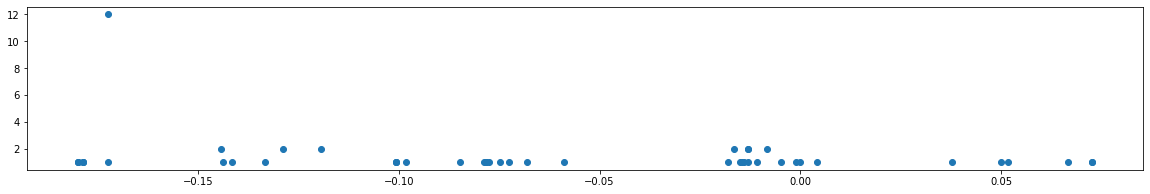

In [160]:
d_hist = {}
X = list(np.ndarray.flatten( data_5 ))
for xi in X:
    if xi in d_hist: d_hist[xi]+=1
    else: d_hist[xi]=1

d_arr = [ d_hist[k] for k in sorted(d_hist.keys())]
plt.scatter(d_hist.keys(), d_arr)
plt.rcParams["figure.figsize"] = (10, 20) # (w, h)
plt.show()

In [166]:
inputs = tf.ones(shape=(3,))
#np.flatten(inputs)
help(model.fit)
tf.keras.losses.Huber

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of tensorflow.python.keras.engine.functional.Functional instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return